In [15]:
from sklearn import datasets
import numpy as np

Carregamento dos dados (dataset iris)

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


Separação dos dados de treino e teste

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [29]:
print("Labels count in y: ", np.bincount(y))
print("Labels count in y_train: ", np.bincount(y_train))
print("Labels count in y_test: ", np.bincount(y_test))

Labels count in y:  [50 50 50]
Labels count in y_train:  [35 35 35]
Labels count in y_test:  [15 15 15]


In [34]:
#TESTANDO A PADRONIZAÇÃO DE ESCALA (MÉDIA = 0  E DESVIO PADRÃO = 1)
ar = np.array([1, 3, 6, 7, 8, 9])
meana = ar.mean()
dstd = ar.std()
print("Média: ", meana)
print("Desvio Padrão: ", dstd)
ar2 = (ar - meana) / dstd
print("Escala Padronizada: ", ar2)
print("Média: ", ar2.mean())
print("Desvio Padrão: ", ar2.std())

Média:  5.666666666666667
Desvio Padrão:  2.8087165910587863
Escala Padronizada:  [-1.66149432 -0.94942533  0.11867817  0.47471266  0.83074716  1.18678166]
Média:  -7.401486830834377e-17
Desvio Padrão:  1.0


Padronização da escala dos dados

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Treinamento do modelo

In [38]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

,"penalty penalty: {'l2','l1','elasticnet'}, default=NoneThe penalty (aka regularization term) to be used.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term if regularization isused.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.`l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.Only used if `penalty='elasticnet'`... versionadded:: 0.24",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, the iterations will stopwhen (loss > previous_loss - tol)... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.",0
,"eta0 eta0: float, default=1Constant by which the updates are multiplied.",0.1
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"random_state random_state: int, RandomState instance or None, default=0Used to shuffle the training data, when ``shuffle`` is set to``True``. Pass an int for reproducible output across multiplefunction calls.See :term:`Glossary `.",1


Predição dos dados de teste

In [39]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples %d' %(y_pred!=y_test).sum())

Misclassified examples 1


Accuracy Score (Precisão)

In [ ]:
from sklearn.metrics import accuracy_score
print('A acurácia do modelo para o dataset de teste é de %.3f' % accuracy_score(y_test, y_pred))

A acrurácia do modelo para o dataset de teste é de 0.978


In [41]:
#outra alternativa para calcular a precisão
print('A acurácia do modelos para o dataset de teste é de %.3f' % ppn.score(X_test_std, y_test))

A acurácia do modelos para o dataset de teste é de 0.978


Regiões de Decisão do Modelo

In [74]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    #definicao dos marcadores e mapa de cores
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot da superfície de decisão
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array( [xx1.ravel(), xx2.ravel()] ).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter( x=X[y==cl, 0], y=X[y==cl, 1] ,
                     alpha=0.8, c=colors[idx],
                     marker=markers[idx], label=cl, 
                     edgecolor='black' )
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='white', edgecolor='black', alpha=0.5,
                    linewidth=1, marker='o',
                    s=100, label='test set' )

C:\Users\ADM\AppData\Local\Temp\ipykernel_28020\3416315392.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter( x=X[y==cl, 0], y=X[y==cl, 1] ,


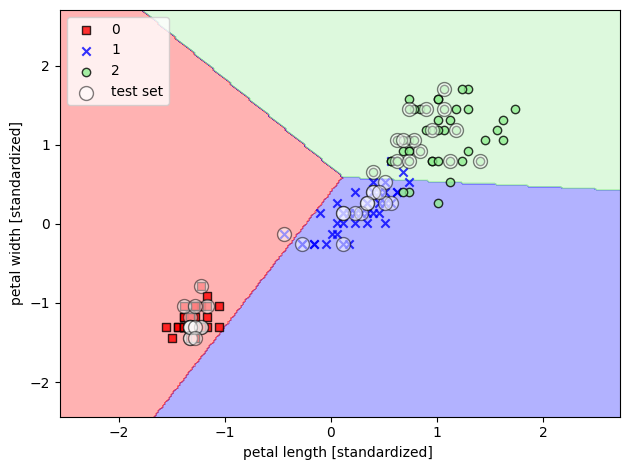

In [76]:
X_combined_std = np.vstack(( X_train_std, X_test_std ))
y_combined = np.hstack(( y_train, y_test ))

plot_decision_regions( X=X_combined_std,
                       y=y_combined,
                       classifier=ppn,
                       test_idx=range(105,150)
                    )

plt.xlabel('petal length [standardized] ')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()